Running experiments for Four Peaks Problem...
The best state:  [0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 0 0 0 0 1 1 1 1 1 0 1 1]
The best fitness:  0.0
Iteration Count (10, 2)
The best state:  [0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0
 1 1 0 0 1 1 1 0 0 0 0 0 0]
The best fitness:  6.0
Iteration Count (10, 2)
The best state:  [0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0
 1 1 0 0 1 1 1 0 0 0 0 0 0]
The best fitness:  6.0
Iteration Count (10, 2)
The best state:  [0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0
 1 1 0 0 1 1 1 0 0 0 0 0 0]
The best fitness:  6.0
Iteration Count (10, 2)
The best state:  [1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1
 1 0 1 1 1 1 0 1 0 1 1 0 1]
The best fitness:  7.0
Iteration Count (20, 2)
The best state:  [0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 0]

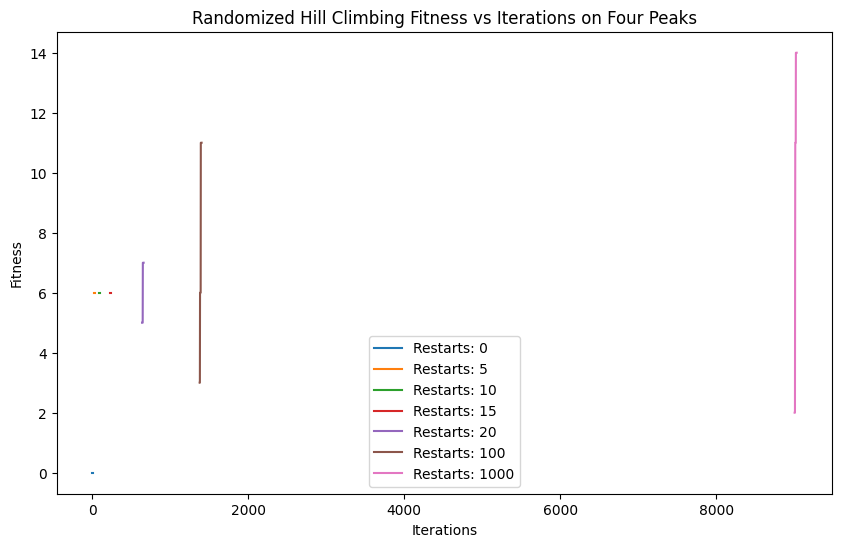

In [3]:
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
import random
from util import plot_fitness_vs_iterations, plot_best_algorithms, run_experiment

np.random.seed(42)

# Four Peaks Problem
def four_peaks_experiment():
    fitness = mlrose.FourPeaks(t_pct=0.15)
    problem = mlrose.DiscreteOpt(length=50, fitness_fn=fitness, maximize=True, max_val=2)

    # Test parameters
    restarts = [0, 5, 10]  # for RHC
    exp_consts = [0.001, 0.005, 0.01]  # for SA
    pop_sizes = [100, 200, 300]  # for GA and MIMIC

    # Run experiments
    print("Running experiments for Four Peaks Problem...")

    # Randomized Hill Climbing
    rhc_curve, rhc_best_curve, rhc_best_fitness, rhc_times = run_experiment(problem, 'rhc', restarts, 'Restarts')
    plot_fitness_vs_iterations("Four Peaks", "Randomized Hill Climbing", rhc_curve, 'Restarts', restarts)

    # Simulated Annealing
    sa_curve, sa_best_curve, sa_best_fitness, sa_times = run_experiment(problem, 'sa', exp_consts, 'Exp Const')
    plot_fitness_vs_iterations("Four Peaks", "Simulated Annealing", sa_curve, 'Exp Const', exp_consts)

    # Genetic Algorithm
    ga_curve, ga_best_curve, ga_best_fitness, ga_times = run_experiment(problem, 'ga', pop_sizes, 'Population Size')
    plot_fitness_vs_iterations("Four Peaks", "Genetic Algorithm", ga_curve, 'Population Size', pop_sizes)

    # MIMIC
    mimic_curve, mimic_best_curve, mimic_best_fitness, mimic_times = run_experiment(problem, 'mimic', pop_sizes, 'Population Size')
    plot_fitness_vs_iterations("Four Peaks", "MIMIC", mimic_curve, 'Population Size', pop_sizes)

    # Compare the best parameters from each algorithm
    best_fitnesses = [max(rhc_best_fitness), max(sa_best_fitness), max(ga_best_fitness), max(mimic_best_fitness)]
    best_times = [min(rhc_times), min(sa_times), min(ga_times), min(mimic_times)]
    best_fitness_curves = [rhc_best_curve, sa_best_curve, ga_best_curve, mimic_best_curve]
    algorithms = ['RHC', 'SA', 'GA', 'MIMIC']

    plot_best_algorithms("Four Peaks", best_fitnesses, algorithms, best_times, best_fitness_curves)
    
four_peaks_experiment()